In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [270]:
isochrone_folder = '/data/jls/isochrones/PARSEC_Gaia/'
metals = np.loadtxt(isochrone_folder+'metal_vals.dat')[::5]
print metals
isos = [np.genfromtxt(isochrone_folder+'grid/gaia_'+str(m)+'.dat') for m in metals]
isos = [i[i.T[1]>8.5] for i in isos]
isosAv = np.concatenate([i for i in isos])

[-2.192 -2.142 -2.092 -2.042 -1.992 -1.942 -1.891 -1.841 -1.791 -1.741
 -1.691 -1.641 -1.591 -1.541 -1.491 -1.441 -1.391 -1.341 -1.291 -1.241
 -1.19  -1.14  -1.09  -1.04  -0.989 -0.939 -0.889 -0.838 -0.788 -0.737
 -0.686 -0.636 -0.585 -0.534 -0.484 -0.433 -0.382 -0.33  -0.279 -0.227
 -0.175 -0.123 -0.071 -0.019  0.034  0.088  0.141  0.196  0.251  0.307
  0.363  0.421  0.478  0.539]


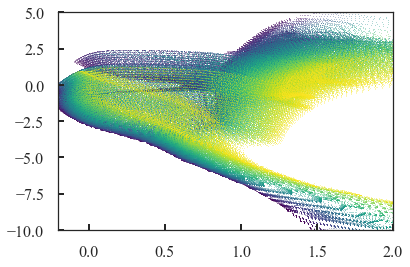

In [300]:

Gindx, GBPindx, GRPindx = 8,9,10
CS=plt.imshow(np.random.uniform(size=(10,10))*(np.max(metals)-np.min(metals))+np.min(metals),cmap=plt.cm.viridis)
plt.clf()
for i in range(len(metals)):
    plt.plot(isos[i].T[GBPindx]-isos[i].T[GRPindx],-isos[i].T[Gindx],'.',ms=1,
            c=plt.cm.viridis((metals[i]-np.min(metals))/(np.max(metals)-np.min(metals))))
plt.xlim(-0.2,2.)
plt.ylim(-10.,5.)
# stage = 5
# plt.plot((isosAv.T[GBPindx]-isosAv.T[GRPindx])[isosAv.T[-1]==stage],
#          -isosAv.T[Gindx][isosAv.T[-1]==stage],'.',ms=2,color='k')
MS = isosAv[isosAv.T[-1]==1]
Gi = isosAv[isosAv.T[-1]==3]
HB = isosAv[(isosAv.T[-1]==4)|(isosAv.T[-1]==5)]


(-0.2, 2.0)

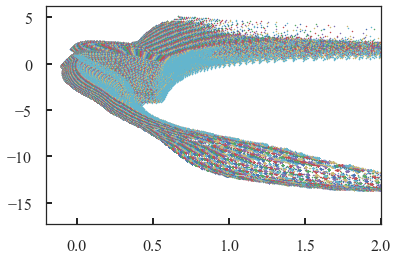

In [373]:
Gindx, GBPindx, GRPindx = 8,9,10
for i in range(len(metals)):
    plt.plot(isos[i].T[GBPindx]-isos[i].T[Gindx],-isos[i].T[Gindx],'.',ms=3)
plt.xlim(-0.2,2.)

(-0.2, 2.0)

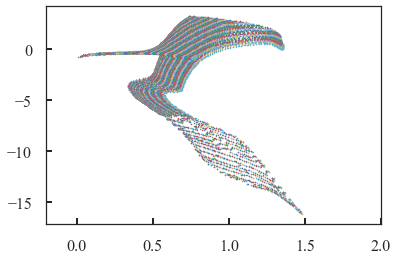

In [252]:
Gindx, GBPindx, GRPindx = 8,9,10
for i in range(len(metals)):
    plt.plot(isos[i].T[Gindx]-isos[i].T[GRPindx],-isos[i].T[Gindx],'.',ms=3)

plt.xlim(-0.2,2.)

(array([0.77801475, 0.6312761 , 0.94508131, 1.02061672, 0.67082111,
        0.32780148, 0.19694748, 0.13540834, 0.14607216, 0.14796054]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 1 Patch objects>)

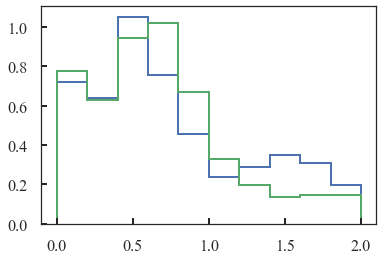

In [339]:
plt.hist((MS.T[GBPindx]-MS.T[GRPindx])[np.log10(MS.T[0]/0.0152)<-1.],range=[0.,2.],histtype='step',normed=True,lw=2)
plt.hist((MS.T[GBPindx]-MS.T[GRPindx])[np.log10(MS.T[0]/0.0152)>-1.],range=[0.,2.],histtype='step',normed=True,lw=2)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.38276782e-04,
        5.81633626e-01, 1.62409455e+00, 1.40523732e+00, 7.43661838e-01,
        4.13410217e-01, 2.31724171e-01]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 1 Patch objects>)

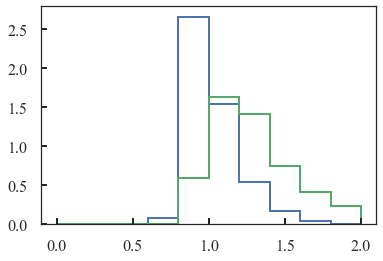

In [340]:
plt.hist((Gi.T[GBPindx]-Gi.T[GRPindx])[np.log10(Gi.T[0]/0.0152)<-1.],range=[0.,2.],histtype='step',normed=True,lw=2)
plt.hist((Gi.T[GBPindx]-Gi.T[GRPindx])[np.log10(Gi.T[0]/0.0152)>-1.],range=[0.,2.],histtype='step',normed=True,lw=2)

(array([0.00800107, 0.02322532, 0.05078455, 0.21591768, 1.89647509,
        1.42396764, 1.03458239, 0.28148198, 0.0544517 , 0.01111259]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 1 Patch objects>)

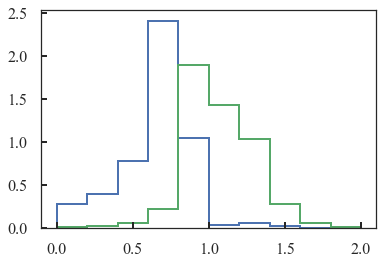

In [337]:
plt.hist((HB.T[GBPindx]-HB.T[GRPindx])[np.log10(HB.T[0]/0.0152)<-1.5],range=[0.,2.],histtype='step',normed=True,lw=2)
plt.hist((HB.T[GBPindx]-HB.T[GRPindx])[np.log10(HB.T[0]/0.0152)>-1.5],range=[0.,2.],histtype='step',normed=True,lw=2)

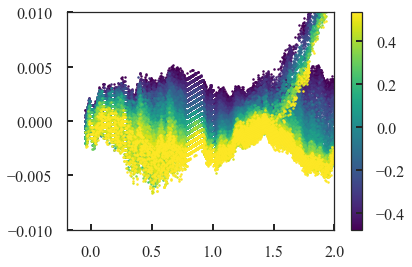

In [268]:
CS=plt.imshow(np.random.uniform(size=(10,10))*(np.max(metals)-np.min(metals))+np.min(metals),cmap=plt.cm.viridis)
plt.clf()
from plotting_general import running_median
r = running_median(isosAv.T[GBPindx]-isosAv.T[GRPindx],
             isosAv.T[Gindx]-isosAv.T[GRPindx],nbins=150)
from scipy.interpolate import interp1d
r = interp1d(r[0],r[1],bounds_error=False)
for i in range(len(metals)):
    plt.plot(isos[i].T[GBPindx]-isos[i].T[GRPindx],
             isos[i].T[Gindx]-isos[i].T[GRPindx]-r(isos[i].T[GBPindx]-isos[i].T[GRPindx]),
             '.',ms=5,c=plt.cm.viridis((metals[i]-np.min(metals))/(np.max(metals)-np.min(metals))))
plt.xlim(-0.2,2.)
plt.ylim(-0.01,0.01)
plt.colorbar(CS)

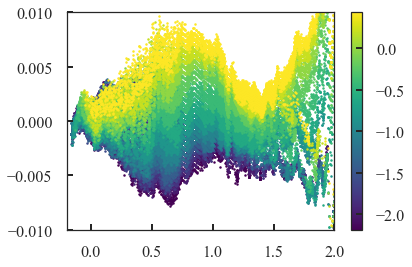

In [97]:
CS=plt.imshow(np.random.uniform(size=(10,10))*(np.max(metals)-np.min(metals))+np.min(metals),cmap=plt.cm.viridis)
plt.clf()
from plotting_general import running_median
r = running_median(isosAv.T[GBPindx]-isosAv.T[GRPindx],
             isosAv.T[GBPindx]-isosAv.T[Gindx],nbins=150)
from scipy.interpolate import interp1d
r = interp1d(r[0],r[1],bounds_error=False)
for i in range(len(metals)):
    plt.plot(isos[i].T[GBPindx]-isos[i].T[GRPindx],
             isos[i].T[GBPindx]-isos[i].T[Gindx]-r(isos[i].T[GBPindx]-isos[i].T[GRPindx]),
             '.',ms=5,c=plt.cm.viridis((metals[i]-np.min(metals))/(np.max(metals)-np.min(metals))))
plt.xlim(-0.2,2.)
plt.ylim(-0.01,0.01)
plt.colorbar(CS)

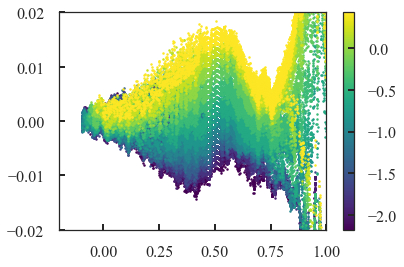

In [101]:
CS=plt.imshow(np.random.uniform(size=(10,10))*(np.max(metals)-np.min(metals))+np.min(metals),cmap=plt.cm.viridis)
plt.clf()
from plotting_general import running_median
r = running_median(isosAv.T[Gindx]-isosAv.T[GRPindx],
             isosAv.T[GBPindx]-isosAv.T[GRPindx],nbins=150)
from scipy.interpolate import interp1d
r = interp1d(r[0],r[1],bounds_error=False)
for i in range(len(metals)):
    plt.plot(isos[i].T[Gindx]-isos[i].T[GRPindx],
             isos[i].T[GBPindx]-isos[i].T[GRPindx]-r(isos[i].T[Gindx]-isos[i].T[GRPindx]),
             '.',ms=5,c=plt.cm.viridis((metals[i]-np.min(metals))/(np.max(metals)-np.min(metals))))
plt.xlim(-0.2,1.)
plt.ylim(-0.02,0.02)
plt.colorbar(CS)

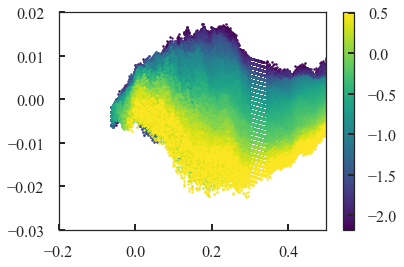

In [377]:
CS=plt.imshow(np.random.uniform(size=(10,10))*(np.max(metals)-np.min(metals))+np.min(metals),cmap=plt.cm.viridis)
plt.clf()
from plotting_general import running_median
r = running_median(isosAv.T[GBPindx]-isosAv.T[Gindx],
             isosAv.T[GBPindx]-isosAv.T[GRPindx],nbins=150)
from scipy.interpolate import interp1d
r = interp1d(r[0],r[1],bounds_error=False)
for i in range(len(metals)):
    plt.plot(isos[i].T[GBPindx]-isos[i].T[Gindx],
             isos[i].T[GBPindx]-isos[i].T[GRPindx]-r(isos[i].T[GBPindx]-isos[i].T[Gindx]),
             '.',ms=5,c=plt.cm.viridis((metals[i]-np.min(metals))/(np.max(metals)-np.min(metals))))
plt.xlim(-0.2,0.5)
plt.ylim(-0.03,0.02)
plt.colorbar(CS)

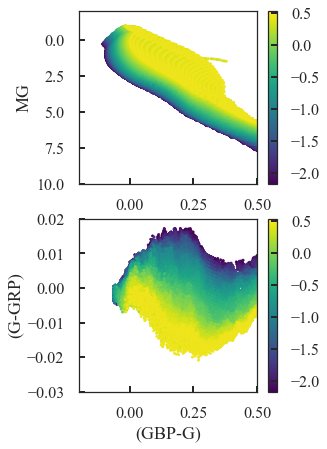

In [394]:
CS=plt.imshow(np.random.uniform(size=(10,10))*(np.max(metals)-np.min(metals))+np.min(metals),cmap=plt.cm.viridis)
plt.clf()

f,a=plt.subplots(2,1,figsize=[4.,7.])
plt.sca(a[0])
from plotting_general import running_median
r = running_median(isosAv.T[GBPindx]-isosAv.T[Gindx],
             isosAv.T[Gindx]-isosAv.T[GRPindx],nbins=150)
from scipy.interpolate import interp1d
r = interp1d(r[0],r[1],bounds_error=False)
plt.scatter((MS.T[GBPindx]-MS.T[Gindx]),
         MS.T[Gindx],
#          '.',ms=5,
            s=5,
         c=plt.cm.viridis((np.log10(MS.T[0]/0.0152)-np.min(metals))/(np.max(metals)-np.min(metals))))
plt.xlim(-0.2,0.5)
plt.ylim(10.,-2.)
plt.colorbar(CS)
plt.ylabel('MG')
plt.sca(a[1])
from plotting_general import running_median
r = running_median(isosAv.T[GBPindx]-isosAv.T[Gindx],
             isosAv.T[Gindx]-isosAv.T[GRPindx],nbins=150)
from scipy.interpolate import interp1d
r = interp1d(r[0],r[1],bounds_error=False)
plt.scatter((MS.T[GBPindx]-MS.T[Gindx]),
         MS.T[Gindx]-MS.T[GRPindx]-r(MS.T[GBPindx]-MS.T[Gindx]),
#          '.',ms=5,
            s=5,
         c=plt.cm.viridis((np.log10(MS.T[0]/0.0152)-np.min(metals))/(np.max(metals)-np.min(metals))))
plt.xlim(-0.2,0.5)
plt.ylim(-0.03,0.02)
plt.colorbar(CS)
plt.xlabel('(GBP-G)')
plt.ylabel('(G-GRP)')
plt.savefig('MS_gaia_isochrones.png', dpi=200)

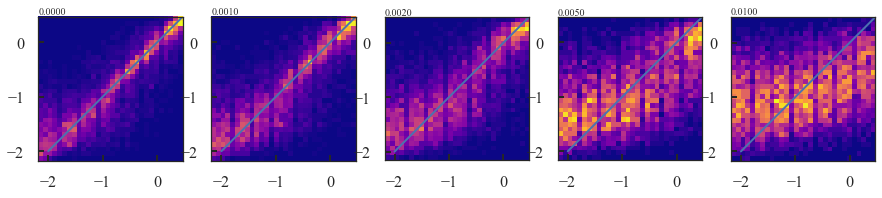

In [395]:
from sklearn.model_selection import train_test_split
sample = np.copy(MS)

compts = np.array([sample.T[GBPindx]-sample.T[Gindx],
                   sample.T[Gindx]-sample.T[GRPindx],
                   sample.T[GBPindx]-sample.T[GRPindx]]).T

out = np.log10(sample.T[0][compts.T[2]<1.]/0.0152)
compts2 = compts[compts.T[2]<1.].T[:2].T

fig,ax=plt.subplots(1,5,figsize=[15.,3.])
err = [1e-5,1e-3,2e-3,5e-3,1e-2]
for i in range(len(err)):
    plt.sca(ax[i])
    compts = compts2+np.random.normal(scale=err[i],size=np.shape(compts2))
    traincompts, testcompts, trainout, testout = train_test_split(compts, out, test_size=0.1)

    from sklearn.ensemble import RandomForestRegressor
    cl = RandomForestRegressor()
    cl.fit(traincompts,trainout)

    from matplotlib.colors import LogNorm
    plt.hist2d(testout,cl.predict(testcompts),bins=30,cmap=plt.cm.plasma);
    xx = np.linspace(-2.,0.5)
    plt.plot(xx,xx)
    plt.gca().set_aspect('equal')
    plt.annotate('%0.4f'%err[i], xy=(0.,1.),xycoords='axes fraction', va='bottom', ha='left')
#     a = plt.axes([i/(1.*len(ax)), 1.,1./(1.*len(ax)), 0.2])
#     plt.hist(out-cl.predict(compts), bins=40,range=[-1.,1.]);
plt.savefig('MS_phot_met_gaia_isochrones.png', dpi=300)

In [391]:
from sklearn import svm
SVM = svm.SVR(kernel='linear')
compts = compts2+np.random.normal(scale=err[i],size=np.shape(compts2))
SVM.fit(compts,out)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [392]:
SVM.coef_

array([[1.6821942 , 0.18764175]])

In [397]:
from pygaia.errors import photometric

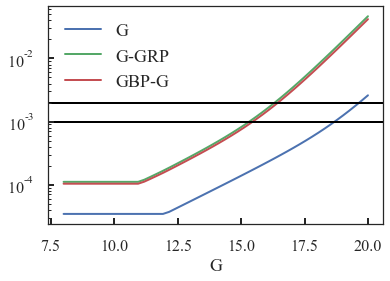

In [424]:
Grange = np.linspace(8.,20.)
nobs_mean = 100
plt.plot(Grange, 
         [np.sqrt(photometric.gMagnitudeError(G)**2)/np.sqrt(nobs_mean) for G in Grange],
        label='G')
plt.plot(Grange, 
         [np.sqrt(photometric.rpMagnitudeError(G,0.5)**2+photometric.gMagnitudeError(G)**2)/np.sqrt(nobs_mean) for G in Grange],
        label='G-GRP')
plt.plot(Grange, 
         [np.sqrt(photometric.bpMagnitudeError(G,0.5)**2+photometric.gMagnitudeError(G)**2)/np.sqrt(nobs_mean) for G in Grange],
        label='GBP-G')
plt.semilogy()
plt.axhline(1e-3, color='k')
plt.axhline(2e-3, color='k')
plt.xlabel('G')
plt.legend(loc='upper left')

In [412]:
from pygaia.errors import utils

In [416]:
np.mean([utils.averageNumberOfTransits(m) for m in np.linspace(0.,360.,1000)])

82.326